In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [93]:
%matplotlib inline

In [111]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [194]:
dimension = 2**9
print(dimension)
rho0 = 0.1
# dx = 0.25
dx = 1/dimension

# obs_size = int(dimension/2)
# H = assimilate.random_H(dimension, obs_size)

H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

512


In [195]:
eig_val, eig_vec, P, sort_ind = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr=True,
    return_sort_ind=True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
# sort_ind = np.argsort(sort_ind)
# eig_val = eig_val[sort_ind]
# eig_vec = eig_vec[:, sort_ind]
# eig_val = np.fft.fftshift(eig_val)
# eig_vec = np.fft.fftshift(eig_vec, axes=1)

P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

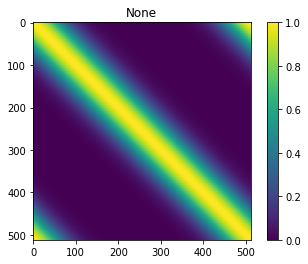

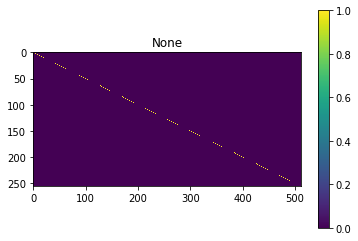

In [196]:
imshow(P, vmin=0)
imshow(H)

In [197]:
trans_mats = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

for key, val in trans_mats.items():
    exec(key + '=val')

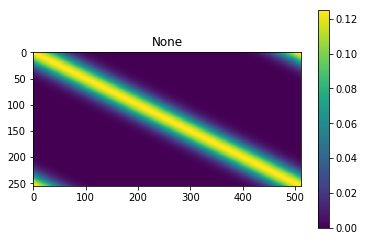

In [198]:
imshow(U @ S @ VT)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


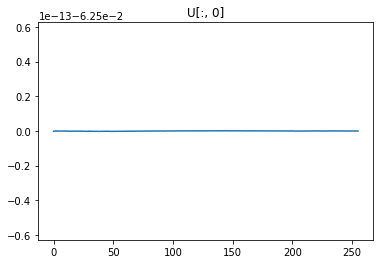

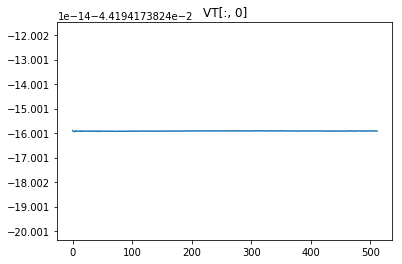

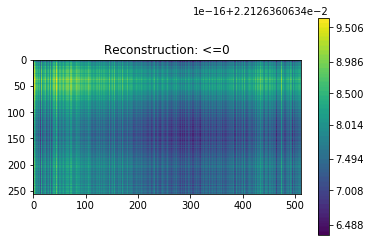

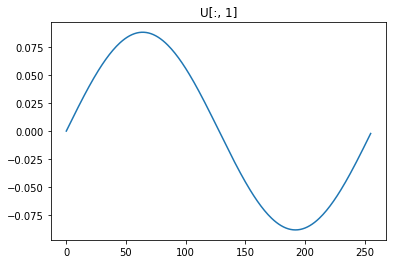

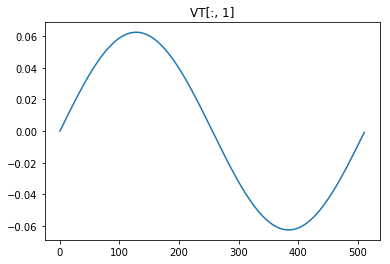

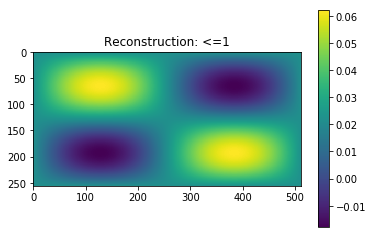

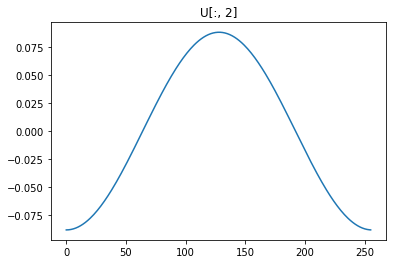

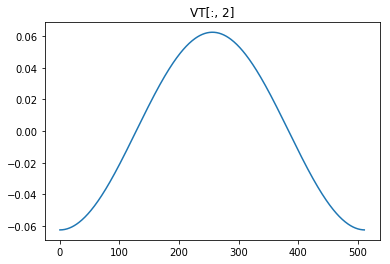

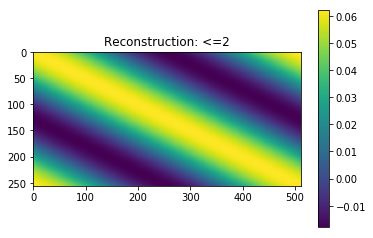

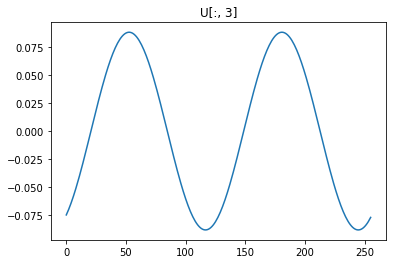

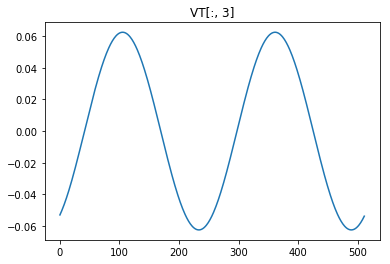

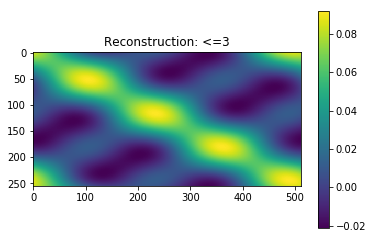

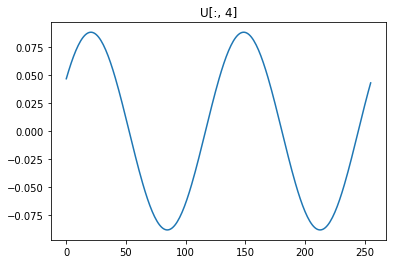

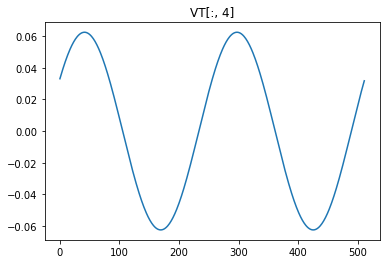

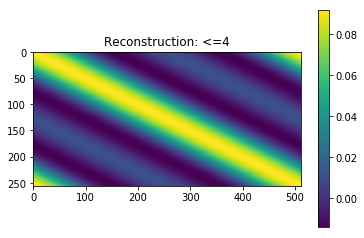

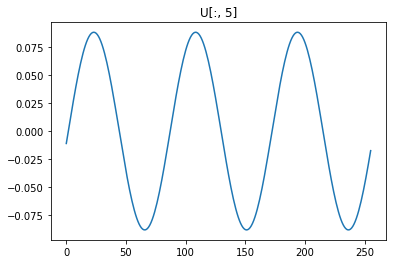

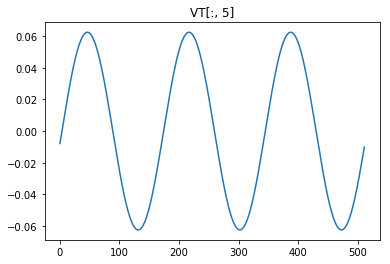

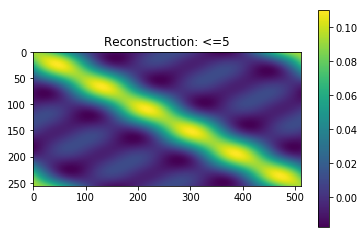

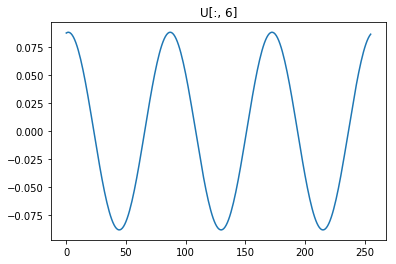

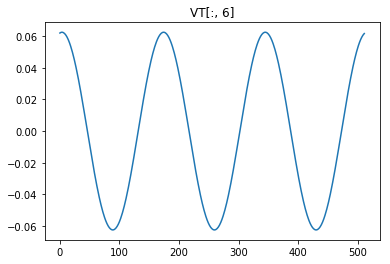

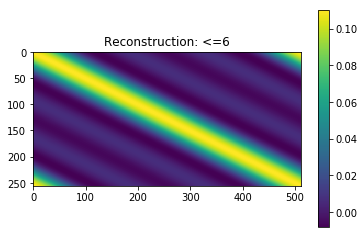

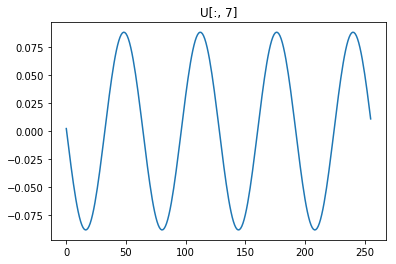

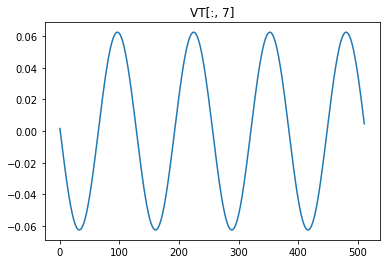

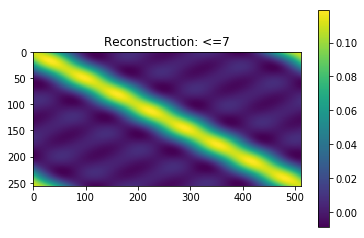

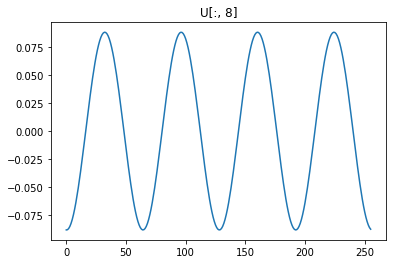

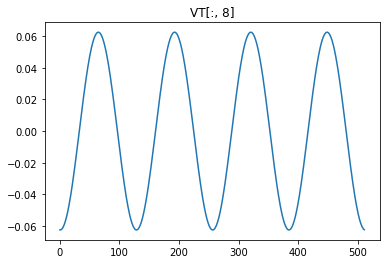

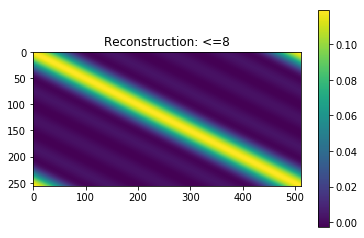

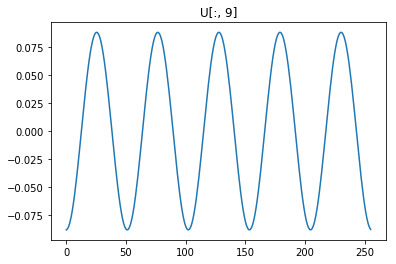

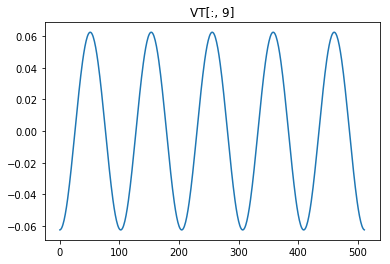

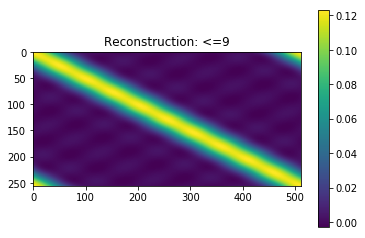

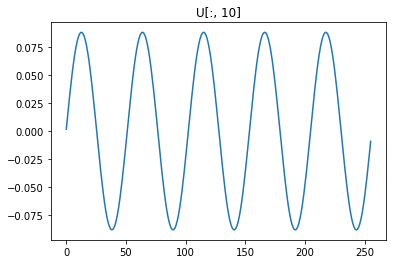

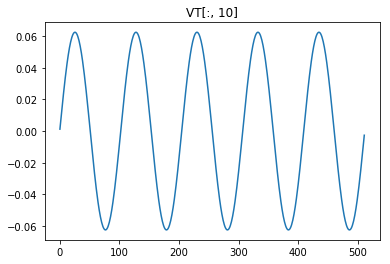

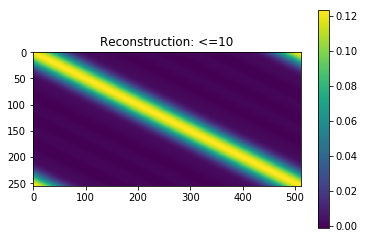

In [199]:
prev = np.zeros_like(S)
for ii in range(11):
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'U[:, {ii}]')
    
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT[:, {ii}]')
    
    prev += (S.diagonal()[ii]
             * U[:, ii:ii+1]
             @ VT[ii:ii + 1])
    
    imshow(prev, f'Reconstruction: <={ii}')

In [202]:
obs_size = int(dimension/2)
H = assimilate.random_H(dimension, obs_size)

y_size = H.shape[0]

In [203]:
eig_val, eig_vec, P, sort_ind = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr=True,
    return_sort_ind=True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
# sort_ind = np.argsort(sort_ind)
# eig_val = eig_val[sort_ind]
# eig_vec = eig_vec[:, sort_ind]
# eig_val = np.fft.fftshift(eig_val)
# eig_vec = np.fft.fftshift(eig_vec, axes=1)

P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

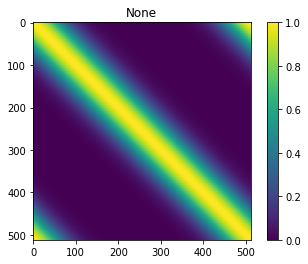

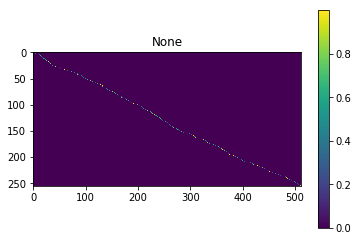

In [204]:
imshow(P, vmin=0)
imshow(H)

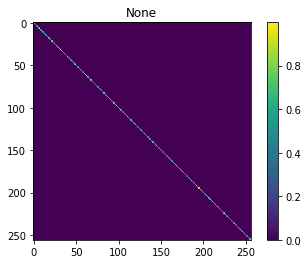

In [209]:
imshow(H @ H.T)

In [ ]:
R = 

In [205]:
trans_mats = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

for key, val in trans_mats.items():
    exec(key + '=val')

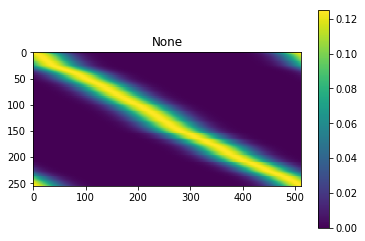

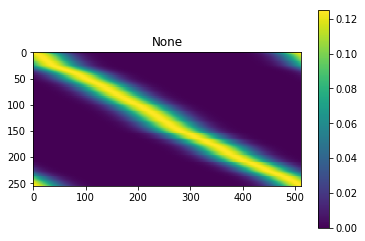

In [210]:
imshow(H @ P_sqrt)
imshow(U @ S @ VT)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


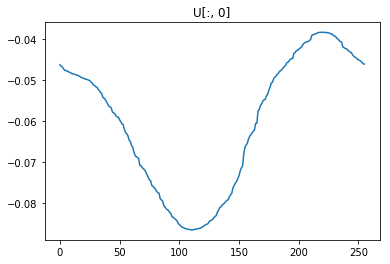

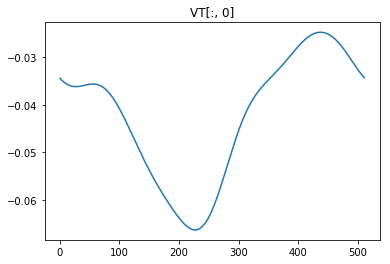

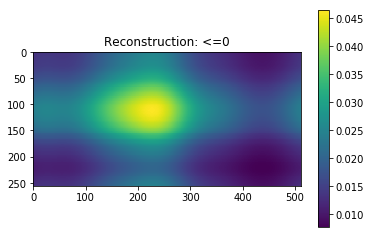

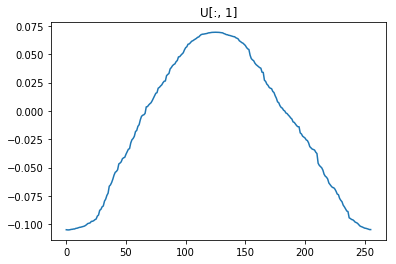

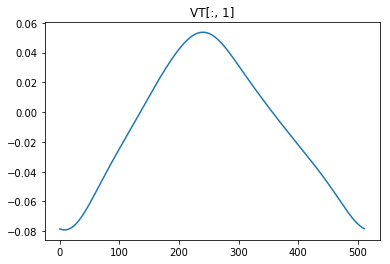

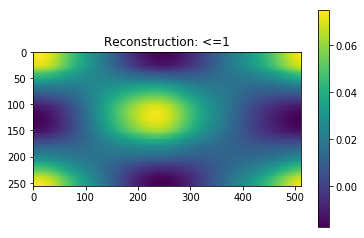

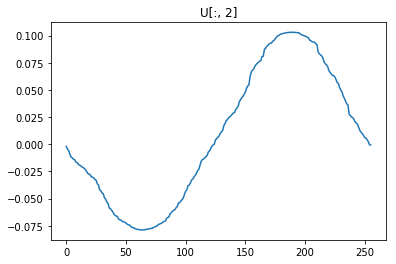

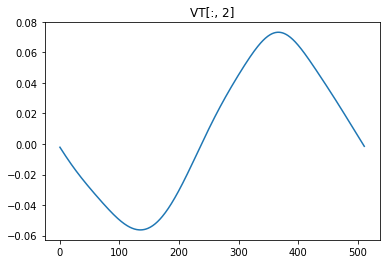

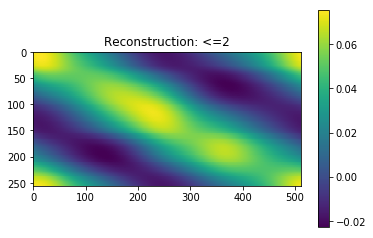

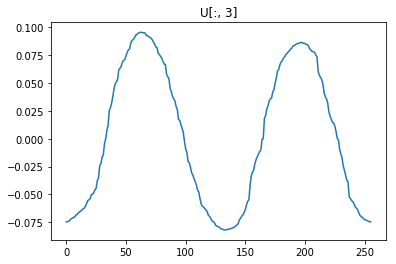

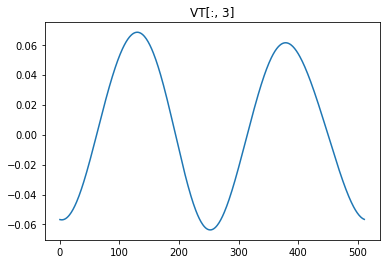

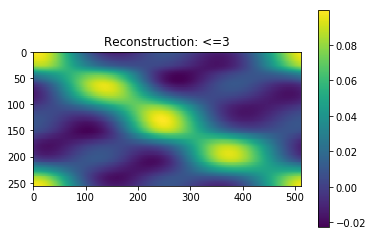

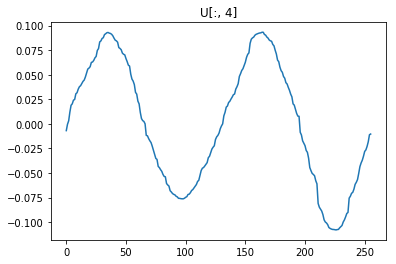

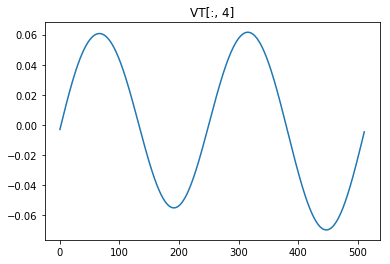

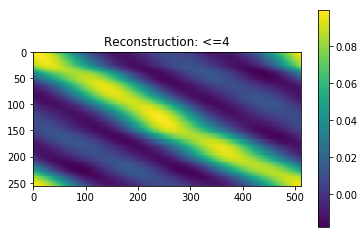

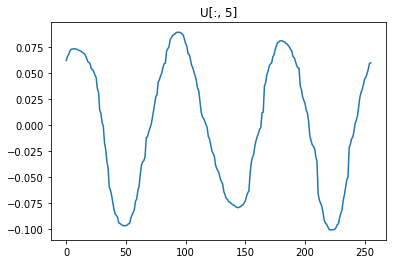

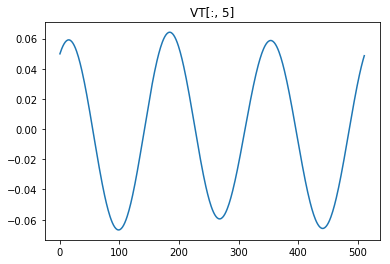

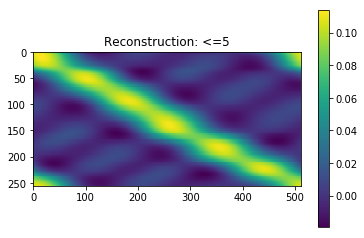

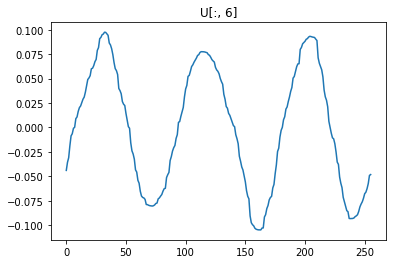

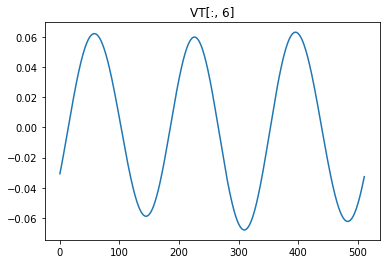

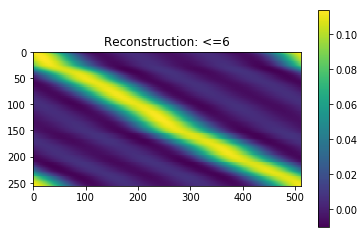

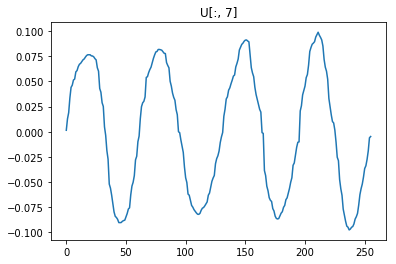

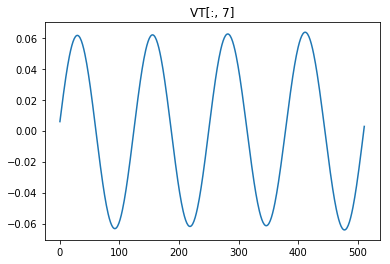

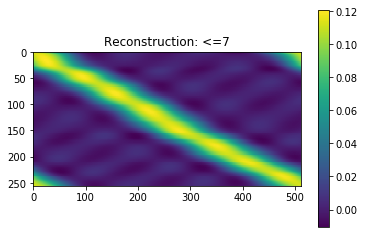

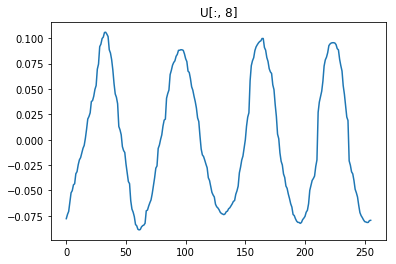

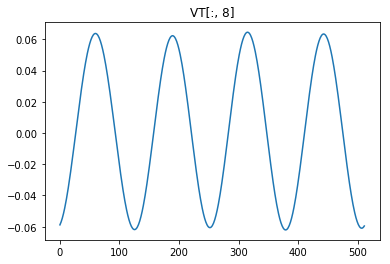

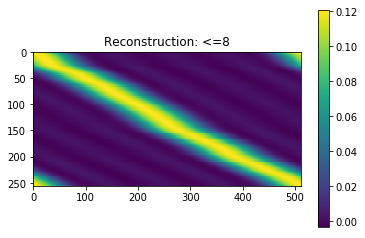

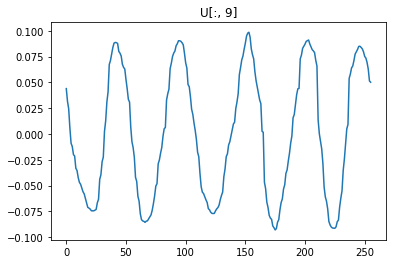

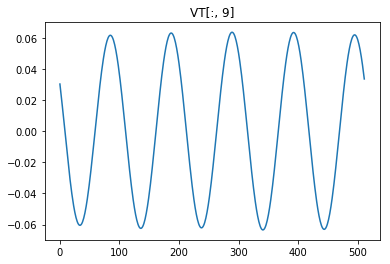

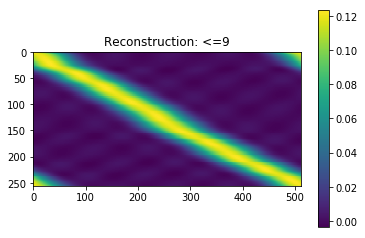

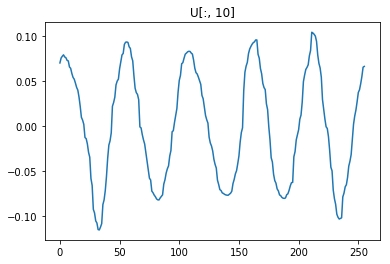

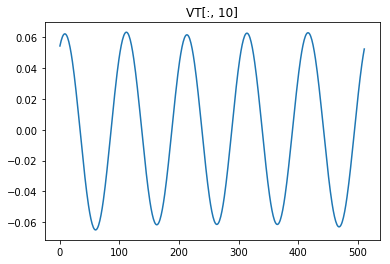

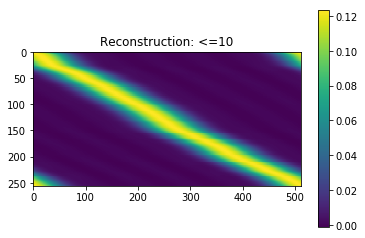

In [207]:
prev = np.zeros_like(S)
for ii in range(11):
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'U[:, {ii}]')
    
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT[:, {ii}]')
    
    prev += (S.diagonal()[ii]
             * U[:, ii:ii+1]
             @ VT[ii:ii + 1])
    
    imshow(prev, f'Reconstruction: <={ii}')

In [ ]:
assimilate.transformation_matrices()